In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
base_path = os.getcwd()
print('base_path', base_path)

# Load the images
img1 = cv2.imread(f'{base_path}/images/img1.png')
img2 = cv2.imread(f'{base_path}/images/img2.png')
img3 = cv2.imread(f'{base_path}/images/img3.png')
img4 = cv2.imread(f'{base_path}/images/img4.png')

noice_image_list = [img1, img2]
shadow_image_list = [img3, img4]

base_path /home/shosen/training/image-noice-show-remove


In [ ]:
# custom function for generating image histogram
def img_hist(image):
    reshaped_img = image[:, :, 0].reshape(img[:, :, 0].shape[0] * img[:, :, 0].shape[0], 1)

    plt.hist(reshaped_img, bins=256, range=(0, 255), color="blue", density=True)
    plt.show()

    # return reshaped_img

# img_hist(img)  # call

# thresholding the image on custom value thr
def threshold(image, thr):
    th_image = np.where(image < thr, image, 100)
    return th_image

# thr_img = threshold(img, 50)  # call
# plt.imshow(thr_img + 100) # show

# generating negative image
def negative(image):
    reshaped_img = image[:, :, 0].reshape(img[:, :, 0].shape[0] * img[:, :, 0].shape[0], 1)
    max_I = max(reshaped_img)
    neg = max_I - image
    return neg

# neg = negative(img) # call
# plt.imshow(neg) # show

def remove_noise(img):
    """
    Removes noise from a given image using Non-Local Means Denoising.
    img (numpy array): Input image in BGR format.
    numpy array: Image with noise removed.
    """
    # Step 1: Apply Non-Local Means Denoising to remove noise
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, h=10, templateWindowSize=7, searchWindowSize=21)
    return denoised_img

def enhance_image(image):
    # Apply sharpening
    sharpening_kernel = np.array([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)

    # Convert to LAB color space for contrast enhancement
    lab = cv2.cvtColor(sharpened, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE on the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_l = clahe.apply(l)

    # Merge back and convert to BGR
    enhanced_lab = cv2.merge((enhanced_l, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

def remove_shadows(denoised_img):
    """
    Removes shadows from a denoised image using adaptive thresholding.
    denoised_img (numpy array): Denoised image to remove shadows from.
    numpy array: Image with shadows removed.
    """
    # Step 2: Convert to grayscale for shadow removal
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    # Step 3: Apply adaptive thresholding to remove shadows
    _, thresholded_img = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
    # Step 4: Apply the thresholded image to get rid of shadows (inverted mask)
    thresholded_img_rgb = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2RGB)
    final_result = cv2.bitwise_and(denoised_img, thresholded_img_rgb)
    return final_result

def remove_human_shadows(image):
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Normalize the L channel for shadow detection
    l_blur = cv2.GaussianBlur(l_channel, (15, 15), 0)
    shadow_mask = cv2.adaptiveThreshold(l_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY_INV, 15, 15)

    # Refine the shadow mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)

    # Inpaint the shadow regions
    shadow_removed = cv2.inpaint(image, shadow_mask, 21, cv2.INPAINT_TELEA)

    return shadow_removed

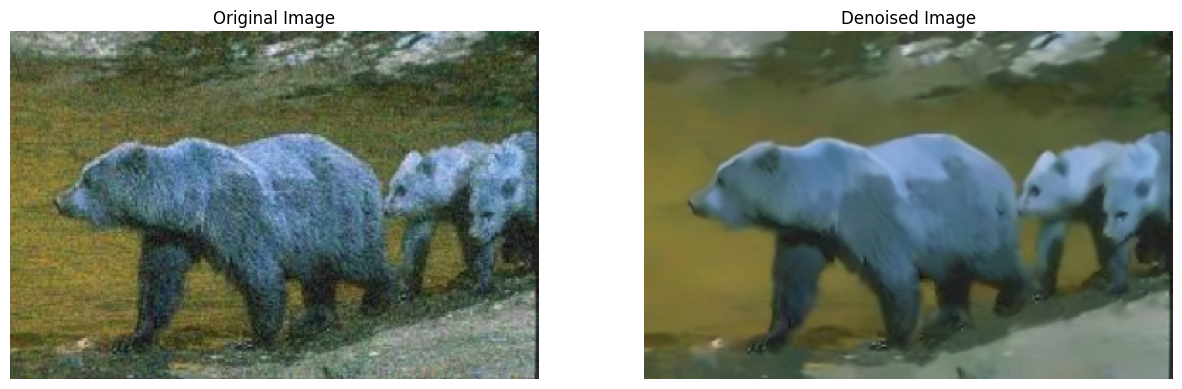

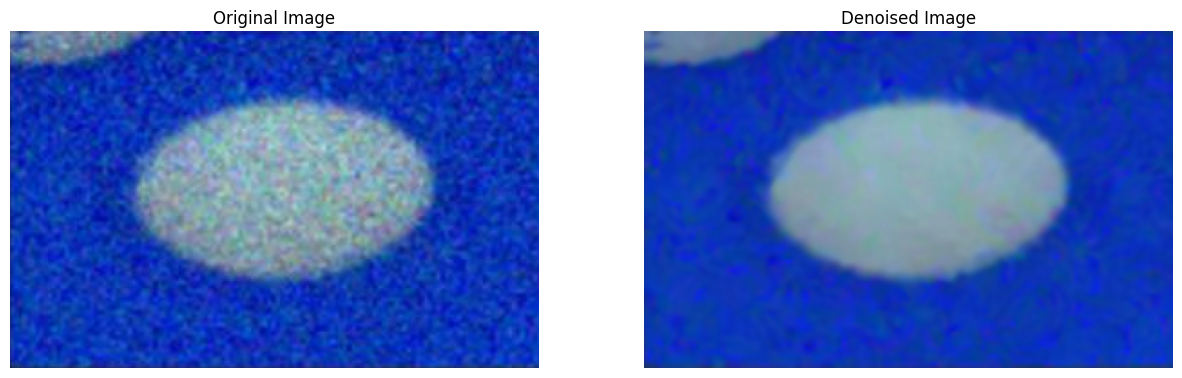

In [ ]:
# Noice remove from iamge
for image in noice_image_list:
    plt.figure(figsize=(15, 10))

    # Display the original image
    plt.subplot(1, 2, 1)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display the denoised image
    plt.subplot(1, 2, 2)
    denoised_rgb = cv2.cvtColor(remove_noise(image), cv2.COLOR_BGR2RGB)
    plt.imshow(denoised_rgb)
    plt.title('Denoised Image')
    plt.axis('off')

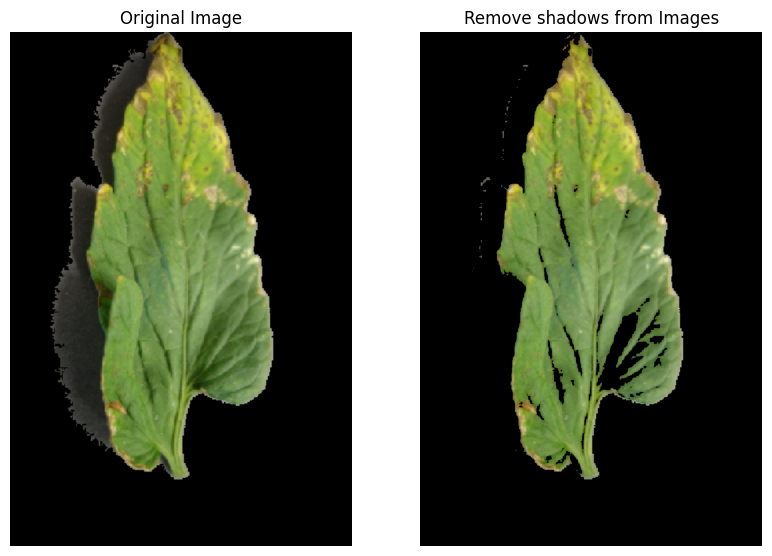

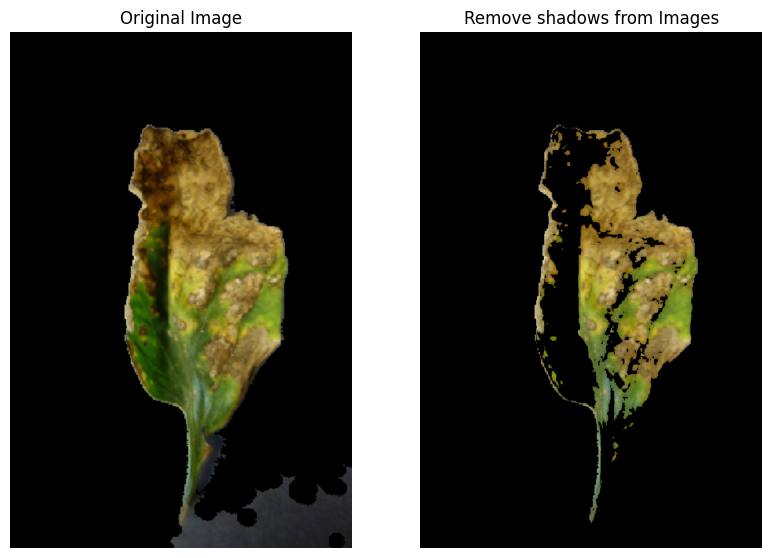

In [ ]:
for image in shadow_image_list:
    # Step 1: Display the results
    plt.figure(figsize=(15, 10))

    # Display the original image
    plt.subplot(1, 3, 1)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display the denoised image
    plt.subplot(1, 3, 2)
    denoised_rgb = cv2.cvtColor(remove_noise(image), cv2.COLOR_BGR2RGB)
    shadow_rgb = cv2.cvtColor(remove_shadows(image), cv2.COLOR_BGR2RGB)
    plt.imshow(shadow_rgb)
    plt.title('Remove shadows from Images')
    plt.axis('off')
    plt.show()

# Name: Md. Shahrair Hose ID: 2116CSE50201